In [2]:
x = [[1], [2], [3], [4]]
y = [[3], [6], [9], [12]]

In [3]:
from copy import deepcopy
import numpy as np


def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs, weights[0]) + weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [4]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss) / (0.0001)
            updated_weights[i][index] -= grad * lr
    return updated_weights

In [5]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

In [6]:
weight_value = []
for epx in range(1000):
    W = update_weights(x, y, W, 0.01)
    weight_value.append(W[0][0][0])

Text(0, 0.5, 'Weight value')

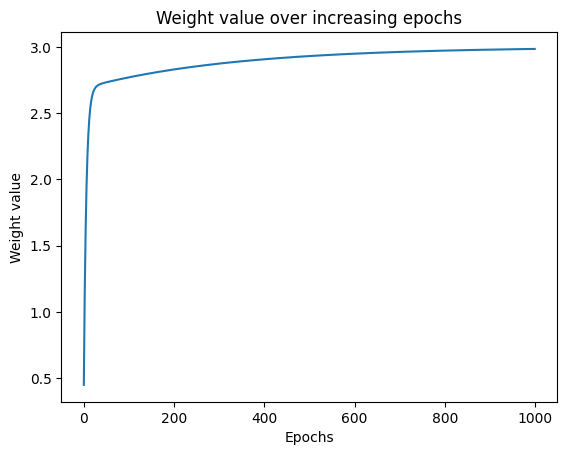

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

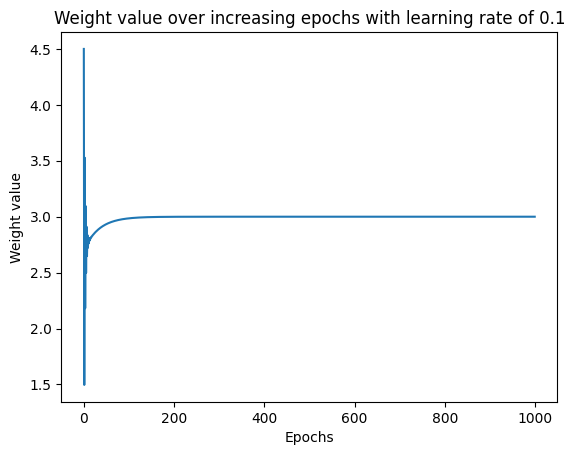

In [8]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

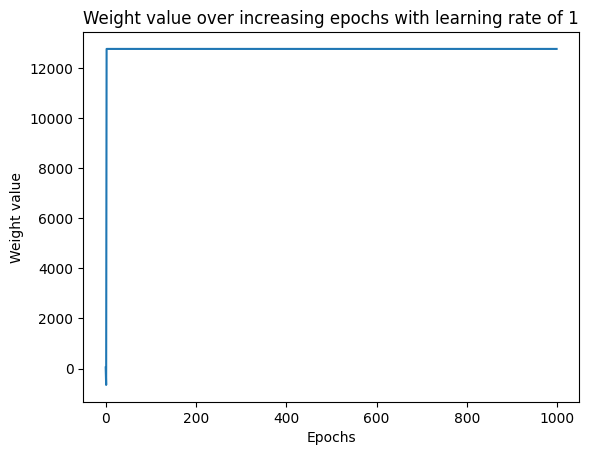

In [9]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [47]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss) / (0.0001)
            updated_weights[i][index] -= grad * lr
            if i % 2 == 0:
                print(
                    "weight value:",
                    np.round(original_weights[i][index], 2),
                    "original loss:",
                    np.round(org_loss, 2),
                    "loss_plus:",
                    np.round(_loss_plus, 2),
                    "gradient:",
                    np.round(grad, 2),
                    "updated_weights:",
                    np.round(updated_weights[i][index], 2),
                )
    return updated_weights

In [50]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    out = np.dot(inputs, weights[0]) + weights[1]
    updated_weights = deepcopy(weights)
    dW = np.mean(2 * (out - outputs) * inputs)
    dB = np.mean(2 * (out - outputs))
    updated_weights[0][0] -= dW * lr
    updated_weights[1][0] -= dB * lr
    _loss_plus = feed_forward(inputs, outputs, updated_weights)
    print(
        "weight value:",
        np.round(original_weights[0][0], 2),
        "original loss:",
        np.round(org_loss, 2),
        "loss_plus:",
        np.round(_loss_plus, 2),
        "gradient:",
        np.round(dW, 2),
        "updated_weights:",
        np.round(updated_weights[0][0], 2),
    )
    return updated_weights

weight value: [0.] original loss: 67.5 loss_plus: 46.88 gradient: -45.0 updated_weights: [0.45]
weight value: [0.45] original loss: 46.88 loss_plus: 32.57 gradient: -37.5 updated_weights: [0.82]
weight value: [0.82] original loss: 32.57 loss_plus: 22.64 gradient: -31.25 updated_weights: [1.14]
weight value: [1.14] original loss: 22.64 loss_plus: 15.75 gradient: -26.05 updated_weights: [1.4]
weight value: [1.4] original loss: 15.75 loss_plus: 10.97 gradient: -21.71 updated_weights: [1.62]
weight value: [1.62] original loss: 10.97 loss_plus: 7.65 gradient: -18.1 updated_weights: [1.8]
weight value: [1.8] original loss: 7.65 loss_plus: 5.35 gradient: -15.09 updated_weights: [1.95]
weight value: [1.95] original loss: 5.35 loss_plus: 3.75 gradient: -12.59 updated_weights: [2.07]
weight value: [2.07] original loss: 3.75 loss_plus: 2.64 gradient: -10.5 updated_weights: [2.18]
weight value: [2.18] original loss: 2.64 loss_plus: 1.87 gradient: -8.76 updated_weights: [2.27]
[array([[2.265612]], 

Text(0, 0.5, 'Weight value')

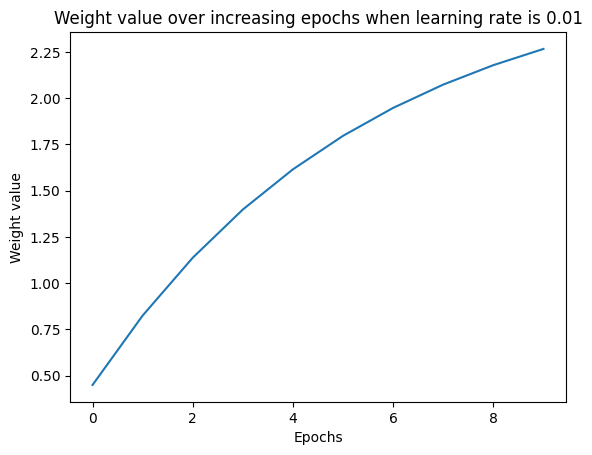

In [41]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: [0.] original loss: 67.5 loss_plus: 30.38 gradient: -45.0 updated_weights: [4.5]
weight value: [4.5] original loss: 30.38 loss_plus: 13.7 gradient: 30.0 updated_weights: [1.5]
weight value: [1.5] original loss: 13.7 loss_plus: 6.21 gradient: -20.25 updated_weights: [3.52]
weight value: [3.52] original loss: 6.21 loss_plus: 2.85 gradient: 13.43 updated_weights: [2.18]
weight value: [2.18] original loss: 2.85 loss_plus: 1.33 gradient: -9.14 updated_weights: [3.1]
weight value: [3.1] original loss: 1.33 loss_plus: 0.65 gradient: 5.99 updated_weights: [2.5]
weight value: [2.5] original loss: 0.65 loss_plus: 0.34 gradient: -4.14 updated_weights: [2.91]
weight value: [2.91] original loss: 0.34 loss_plus: 0.2 gradient: 2.65 updated_weights: [2.65]
weight value: [2.65] original loss: 0.2 loss_plus: 0.13 gradient: -1.9 updated_weights: [2.84]
weight value: [2.84] original loss: 0.13 loss_plus: 0.1 gradient: 1.15 updated_weights: [2.72]
[array([[2.72141]], dtype=float32), array([[0

Text(0, 0.5, 'Weight value')

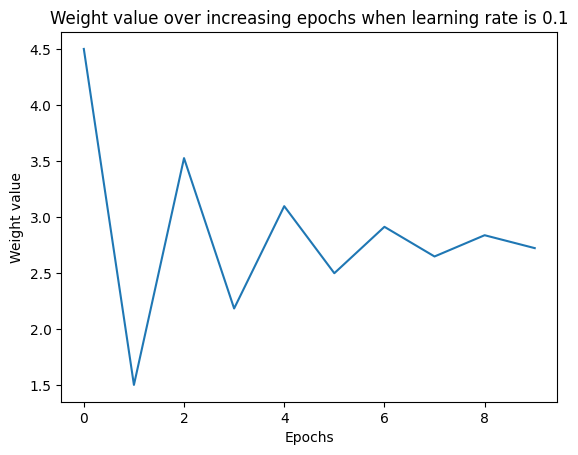

In [42]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: [0.] original loss: 67.5 loss_plus: 16605.0 gradient: -45.0 updated_weights: [45.]
weight value: [45.] original loss: 16605.0 loss_plus: 4093267.5 gradient: 705.0 updated_weights: [-660.]
weight value: [-660.] original loss: 4093267.5 loss_plus: 1009027867.5 gradient: -11070.0 updated_weights: [10410.]
weight value: [10410.] original loss: 1009027867.5 loss_plus: 248734597905.0 gradient: 173805.0 updated_weights: [-163395.]
weight value: [-163395.] original loss: 248734597905.0 loss_plus: 61315353310567.5 gradient: -2728845.0 updated_weights: [2565450.]
weight value: [2565450.] original loss: 61315353310567.5 loss_plus: 1.5114795381363668e+16 gradient: 42844530.0 updated_weights: [-40279080.]
weight value: [-40279080.] original loss: 1.5114795381363668e+16 loss_plus: 3.7259350257699953e+18 gradient: -672685245.0 updated_weights: [6.3240614e+08]
weight value: [6.3240614e+08] original loss: 3.7259350257699953e+18 loss_plus: 9.184770200055566e+20 gradient: 10561568115.0 upda

Text(0, 0.5, 'Weight value')

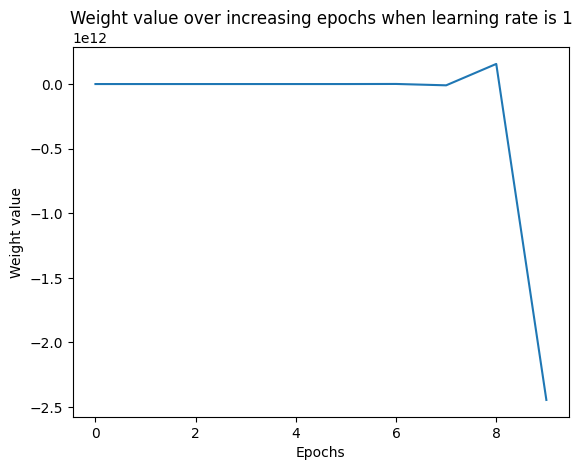

In [59]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
# to see the weight ossilate
# plt.yscale("symlog")
plt.title('Weight value over increasing epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [46]:
x, y, W

W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

out = np.dot(x, W[0]) + W[1]
loss = np.mean(np.square(out - y))

out_plus = np.dot(x, W[0] + 0.0001) + W[1]
loss_plus = np.mean(np.square(out_plus - y))
grad = (loss_plus - loss) / (0.0001)

# dC/dW * lr
np.mean(2 * (np.dot(x, W[0]) + W[1] - y) * x) * 1, loss

(-45.0, 67.5)

loss and loss_plus are exactly the same value. Resulting in zero grad.

The numerical way of calculating gradient does not work for large weights. For example, when a weight are of type and value of np.array([12755.16], dtype=float32), adding .0001 do not change its value due to floating point representation.

Using chain rule didn't help with calculating the gradient. Exposing the exploding loss phenom of large lr.